In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the dataset

In [3]:
data=pd.read_csv("/content/Heart_Disease_Prediction.csv")

In [4]:
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [5]:
data.info

<bound method DataFrame.info of      Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exerci

In [6]:
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

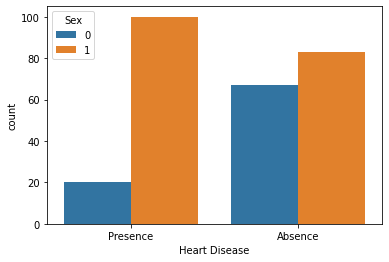

In [7]:
sns.countplot(x=data['Heart Disease'],hue='Sex',data=data)

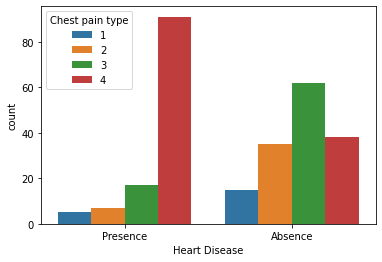

In [8]:
sns.countplot(x=data['Heart Disease'],hue='Chest pain type',data=data)

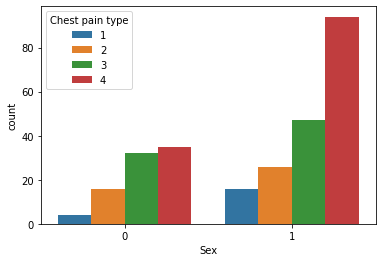

In [9]:
sns.countplot(x=data['Sex'],hue='Chest pain type',data=data)

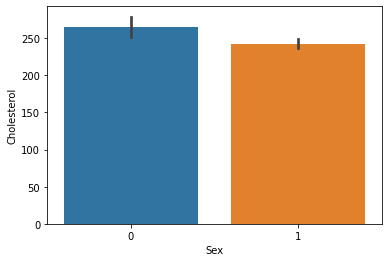

In [10]:
sns.barplot(x=data['Sex'],y=data['Cholesterol'],data=data)

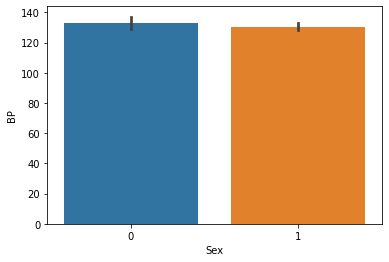

In [11]:
sns.barplot(x=data['Sex'],y=data['BP'],data=data)

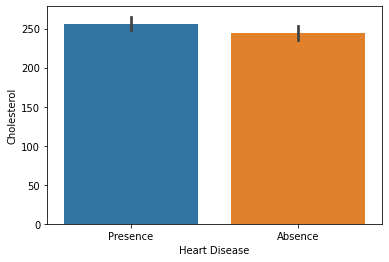

In [12]:
sns.barplot(x=data['Heart Disease'],y=data['Cholesterol'],data=data)

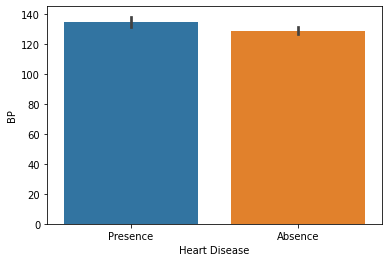

In [13]:
sns.barplot(x=data['Heart Disease'],y=data['BP'],data=data)

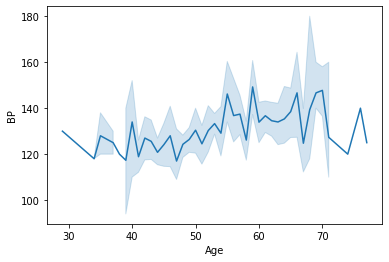

In [14]:
sns.lineplot(x=data['Age'],y=data['BP'],data=data)

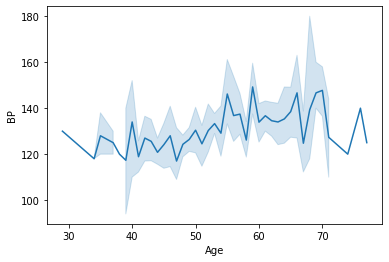

In [15]:
sns.lineplot(x=data['Age'],y=data['BP'],data=data)

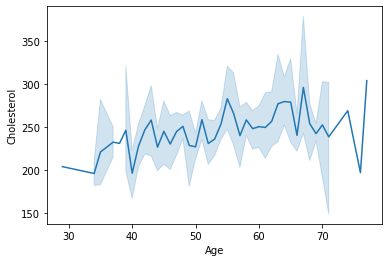

In [16]:
sns.lineplot(x=data['Age'],y=data['Cholesterol'],data=data)

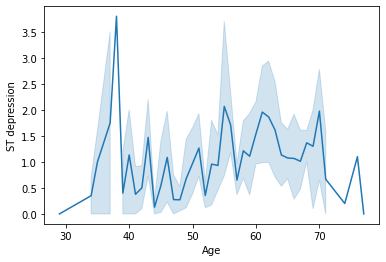

In [17]:
sns.lineplot(x=data['Age'],y=data['ST depression'],data=data)

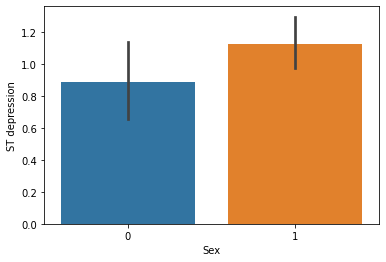

In [18]:
sns.barplot(x=data['Sex'],y=data['ST depression'],data=data)

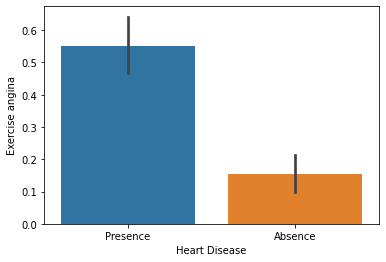

In [19]:
sns.barplot(x=data['Heart Disease'],y=data['Exercise angina'],data=data)

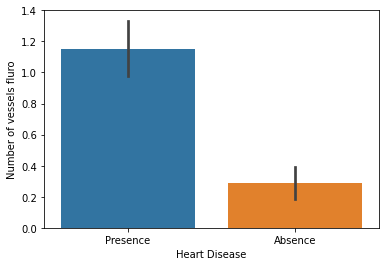

In [20]:
sns.barplot(x=data['Heart Disease'],y=data['Number of vessels fluro'],data=data)

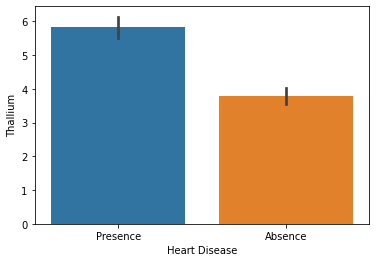

In [21]:
sns.barplot(x=data['Heart Disease'],y=data['Thallium'],data=data)

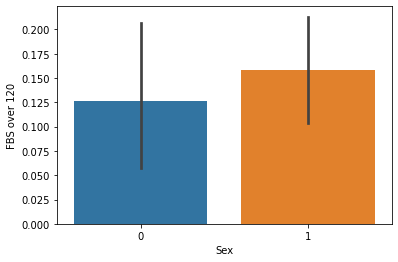

In [22]:
sns.barplot(x=data['Sex'],y=data['FBS over 120'],data=data)

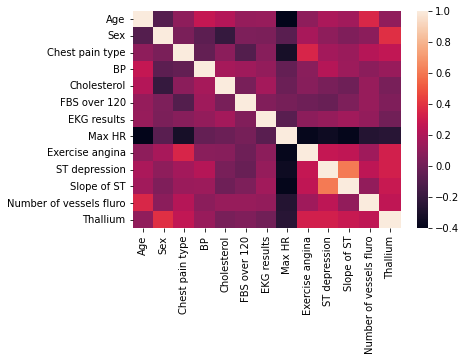

In [23]:
sns.heatmap(data.corr())

In [24]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
data['Heart Disease']=le.fit_transform(data['Heart Disease'])

In [25]:
y=data['Heart Disease']
x=data.drop(['Heart Disease'],axis=1)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
score_1=accuracy_score(y_test,pred_1)

In [28]:
score_1

0.7777777777777778

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_2=rfc.predict(x_test)
score_2=accuracy_score(y_test,pred_2)

In [30]:
score_2

0.7407407407407407

In [31]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred_3=xgb.predict(x_test)
score_3=accuracy_score(y_test,pred_3)

In [32]:
score_3

0.7777777777777778

In [33]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
for i in range(1,21):
  knn=KNeighborsClassifier(n_neighbors=1)
  knn.fit(x_train,y_train)
  preds=knn.predict(x_test)
  scores=accuracy_score(y_test,preds)
  list_1.append(scores)

In [34]:
max(list_1)

0.5